#### Programming for Data Science Assignment-I
#### Git-hub: https://github.com/nimesh2091/An-analysis-on-Baseball.git


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### 1)	Load in the appropriate csv file as a pandas dataframe (batting.csv)

In [2]:
bat_data = pd.read_csv('Batting.csv')

#### 2)	Print out the dimensions and info about the dataframe you just created

In [51]:
#dimensions of the dataframe
bat_data.shape

(102816, 26)

In [3]:
bat_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102816 entries, 0 to 102815
Data columns (total 25 columns):
playerID     102816 non-null object
nameFirst    102816 non-null object
nameLast     102816 non-null object
birthYear    102816 non-null int64
yearID       102816 non-null int64
stint        102816 non-null int64
teamID       102816 non-null object
lgID         102079 non-null object
G            102816 non-null int64
AB           102816 non-null int64
R            102816 non-null int64
H            102816 non-null int64
2B           102816 non-null int64
3B           102816 non-null int64
HR           102816 non-null int64
RBI          102392 non-null float64
SB           101516 non-null float64
CS           79360 non-null float64
BB           102816 non-null int64
SO           94978 non-null float64
IBB          66251 non-null float64
HBP          100006 non-null float64
SH           96478 non-null float64
SF           66782 non-null float64
GIDP         76706 non-null float

In [4]:
#Fill in the NULL values
bat_data['lgID'].fillna(value='N/A',inplace=True)
bat_data.fillna(value=0.0,inplace=True)

#Create an additional feature - PA
bat_data['PA'] = bat_data['AB']+bat_data['BB']+bat_data['IBB']+bat_data['SH']+bat_data['SF']

#### 3)	How many players have hit 40 or more HRs in one single season? (Number only)

In [5]:
#pivot-table function provides a multi-index data-frame with sumof HR for a player every season
HR_season = bat_data.pivot_table(values='HR', index=['playerID','yearID'],aggfunc='sum').reset_index()
#nunique provides the number of unique playerID from the subset
HR_season[HR_season['HR'] >= 40]['playerID'].nunique()

142

#### 4)	How many players have hit more than 600 HRs for their career? (Dataframe)

In [6]:
#pivot-table function provides a data-frame with sum of HR for a player every season
HR_career = bat_data.pivot_table(values='HR', index=['nameFirst','nameLast','playerID'],aggfunc='sum').reset_index()
#the data is filtered for players with 600+ HR
HR_career[HR_career['HR'] > 600].sort_values(by='HR',ascending=False).reset_index(drop=True)

,nameFirst,nameLast,playerID,HR
0,Barry,Bonds,bondsba01,762
1,Hank,Aaron,aaronha01,755
2,Babe,Ruth,ruthba01,714
3,Alex,Rodriguez,rodrial01,696
4,Willie,Mays,mayswi01,660
5,Ken,Griffey,griffke02,630
6,Jim,Thome,thomeji01,612
7,Sammy,Sosa,sosasa01,609


#### 5)	How many players have hit 40 2Bs, 10 3Bs, 200 Hits, and 30 HRs (inclusive) in one season? (Number Only)

In [7]:
#pivot-table function provides a data-frame with sum of HR,2B,3B,H for a player every season
hits_stat = bat_data.pivot_table(values=['2B','3B','H','HR'], index=['playerID','yearID'],aggfunc='sum').reset_index()
#filter aggregated data for players with 40 2Bs, 10 3Bs, 200 Hits, and 30 HRs
hits_stat[(hits_stat['2B'] >= 40) & (hits_stat['3B'] >= 10) & (hits_stat['H'] >= 200) & (hits_stat['HR'] >= 30)]['playerID'].nunique()

11

#### 6)	How many players have had 100 or more SBs in a season? (Dataframe)

In [8]:
#pivot-table function provides a data-frame with sum of SB for a player every season
stolen_base = bat_data.pivot_table(values='SB', index=['nameFirst','nameLast','playerID','yearID'],aggfunc='sum').reset_index()
#data filtered for players with atleast 100 SB
stolen_base[stolen_base['SB'] >= 100].sort_values(by=['playerID','SB'],ascending=False).reset_index(drop=True)

,nameFirst,nameLast,playerID,yearID,SB
0,Maury,Wills,willsma01,1962,104.0
1,John,Ward,wardjo01,1887,111.0
2,Hugh,Nicol,nicolhu01,1887,138.0
3,Hugh,Nicol,nicolhu01,1888,103.0
4,Arlie,Latham,lathaar01,1887,129.0
5,Arlie,Latham,lathaar01,1888,109.0
6,Rickey,Henderson,henderi01,1982,130.0
7,Rickey,Henderson,henderi01,1983,108.0
8,Rickey,Henderson,henderi01,1980,100.0
9,Billy,Hamilton,hamilbi01,1889,111.0


#### 7)	How many players in the 1960s have hit more than 200 HRs? (Dataframe)

In [9]:
#pivot-table function provides a data-frame for year 1960 with sum of HR for a player every season
HR_1960 = bat_data[(bat_data['yearID'] >= 1960) & (bat_data['yearID'] < 1970)].pivot_table(values='HR', index=['nameFirst','nameLast','playerID'],aggfunc='sum').reset_index()
#filter out players with 200+ HR
HR_1960[HR_1960['HR'] > 200].sort_values(by=['HR'],ascending=False).reset_index(drop=True)

,nameFirst,nameLast,playerID,HR
0,Harmon,Killebrew,killeha01,393
1,Hank,Aaron,aaronha01,375
2,Willie,Mays,mayswi01,350
3,Frank,Robinson,robinfr02,316
4,Willie,McCovey,mccovwi01,300
5,Frank,Howard,howarfr01,288
6,Norm,Cash,cashno01,278
7,Ernie,Banks,bankser01,269
8,Mickey,Mantle,mantlmi01,256
9,Orlando,Cepeda,cepedor01,254


#### 8)	Who has hit the most HRs in history? (Dataframe)

In [10]:
bat_data.pivot_table(values='HR', index=['playerID','nameFirst','nameLast'],aggfunc='sum').sort_values(by='HR',ascending=False).reset_index().head(1)

,playerID,nameFirst,nameLast,HR
0,bondsba01,Barry,Bonds,762


#### 9)	Who had the most hits in the 1970s? (Dataframe)

In [11]:
bat_data[(bat_data['yearID'] >= 1970) & (bat_data['yearID'] < 1980)].pivot_table(values='H', index=['playerID','nameFirst','nameLast'],aggfunc='sum').sort_values(by='H',ascending=False).reset_index().head(1)

,playerID,nameFirst,nameLast,H
0,rosepe01,Pete,Rose,2045


#### 10)	Top 5 highest OBP (on base percentage) with at least 500 PAs in 1977?  (Dataframe)

In [12]:
obp_top5 = bat_data[bat_data['yearID'] == 1977].pivot_table(values=['AB','H','SH','SF','BB','IBB','PA'], index=['nameFirst','nameLast','playerID'],aggfunc='sum').reset_index()
obp_top5['OBP'] = (obp_top5['H']+obp_top5['BB']+obp_top5['IBB']+obp_top5['SH']+obp_top5['SF'])/obp_top5['AB']
obp_top5[obp_top5['PA'] >= 500].dropna().sort_values(by='OBP',ascending=False).reset_index(drop=True).head(5)

,nameFirst,nameLast,playerID,AB,BB,H,IBB,PA,SF,SH,OBP
0,Ken,Singleton,singlke01,536,107,176,13.0,662.0,6.0,0.0,0.563433
1,Reggie,Smith,smithre06,488,104,150,11.0,611.0,7.0,1.0,0.559426
2,Gene,Tenace,tenacge01,437,125,102,10.0,578.0,4.0,2.0,0.556064
3,Mike,Hargrove,hargrmi01,525,103,160,7.0,649.0,6.0,8.0,0.540952
4,Rod,Carew,carewro01,616,69,239,15.0,706.0,5.0,1.0,0.534091


#### 11)	Top 8 highest averages in 2013 with at least 300 PAs? (Dataframe)

In [13]:
avg_top8 = bat_data[bat_data['yearID'] == 2013].pivot_table(values=['AB','H','SH','SF','BB','IBB','PA'], index=['nameFirst','nameLast','playerID'],aggfunc='sum').reset_index()
avg_top8['Average'] = avg_top8['H']/avg_top8['AB']
avg_top8[avg_top8['PA'] >= 300].sort_values(by='Average',ascending=False).reset_index(drop=True).head(8)

,nameFirst,nameLast,playerID,AB,BB,H,IBB,PA,SF,SH,Average
0,Miguel,Cabrera,cabremi01,555,90,193,19.0,666.0,2.0,0.0,0.347748
1,Hanley,Ramirez,ramirha01,304,27,105,3.0,336.0,2.0,0.0,0.345395
2,Michael,Cuddyer,cuddymi01,489,46,162,5.0,543.0,3.0,0.0,0.331288
3,Joe,Mauer,mauerjo01,445,61,144,7.0,515.0,2.0,0.0,0.323596
4,Mike,Trout,troutmi01,589,110,190,10.0,717.0,8.0,0.0,0.322581
5,Chris,Johnson,johnsch05,514,29,165,5.0,550.0,2.0,0.0,0.321012
6,Freddie,Freeman,freemfr01,551,66,176,10.0,632.0,5.0,0.0,0.319419
7,Yasiel,Puig,puigya01,382,36,122,6.0,427.0,3.0,0.0,0.319372


#### 12)	Leaders in hits from 1940 up to and including 1949. (Dataframe)

In [14]:
hits = bat_data[(bat_data['yearID'] >= 1940) & (bat_data['yearID'] < 1950)].pivot_table(values='H', index=['nameFirst','nameLast','playerID','yearID'],aggfunc='sum').reset_index()
i=1940
all_hits = pd.DataFrame()
#player with most hits in a year selected iteratively for years 1940 through 1949 and appended into a dataframe
while i < 1950:
    hits_i = hits[hits['yearID']== i][hits[hits['yearID']== i]['H'] == hits[hits['yearID']== i]['H'].max()]
    all_hits = all_hits.append(hits_i)
    i = i+1
all_hits.reset_index(drop=True)

,nameFirst,nameLast,playerID,yearID,H
0,Barney,McCosky,mccosba01,1940,200
1,Doc,Cramer,cramedo01,1940,200
2,Rip,Radcliff,radclri01,1940,200
3,Cecil,Travis,travice01,1941,218
4,Johnny,Pesky,peskyjo01,1942,205
5,Stan,Musial,musiast01,1943,220
6,Snuffy,Stirnweiss,stirnsn01,1944,205
7,Tommy,Holmes,holmeto01,1945,224
8,Stan,Musial,musiast01,1946,228
9,Johnny,Pesky,peskyjo01,1947,207


#### 13)	Who led MLB with the most hits the most times?  And how many times?  (Dataframe, Number)

In [15]:
mlb = bat_data.pivot_table(values='H', index=['nameFirst','nameLast','playerID','yearID'],aggfunc='sum').reset_index()
#get the yearID for first season
i=bat_data['yearID'].min()
all_mlb = pd.DataFrame()
#select the palyer with max Hits in the season, and iterate for all the years, and append the playerID and yearID into a new dataframe
while i <= bat_data['yearID'].max():
    mlb_i = mlb[mlb['yearID']== i][mlb[mlb['yearID']== i]['H'] == mlb[mlb['yearID']== i]['H'].max()]
    mlb_i['MLB_most_hits'] = 1
    all_mlb = all_mlb.append(mlb_i)
    i = i+1
#aggregate the new datframe by playerID and count the number of times playerID is present in the dataframe
mlb_agg = all_mlb.pivot_table(values='MLB_most_hits',index=['nameFirst','nameLast','playerID'],aggfunc='count').reset_index()
mlb_agg[mlb_agg['MLB_most_hits'] == mlb_agg['MLB_most_hits'].max()].reset_index(drop=True)

,nameFirst,nameLast,playerID,MLB_most_hits
0,Ichiro,Suzuki,suzukic01,7
1,Pete,Rose,rosepe01,7
2,Ty,Cobb,cobbty01,7


#### 14) Which players have played the most games for their careers?  Top 5, descending by games played presented as a dataframe

In [16]:
bat_data.pivot_table(values='G', index=['nameFirst','nameLast','playerID'],aggfunc='sum').reset_index().sort_values(by='G',ascending=False).reset_index(drop=True).head(5)

,nameFirst,nameLast,playerID,G
0,Pete,Rose,rosepe01,3562
1,Carl,Yastrzemski,yastrca01,3308
2,Hank,Aaron,aaronha01,3298
3,Rickey,Henderson,henderi01,3081
4,Ty,Cobb,cobbty01,3035


#### 15) How many players have had more than 3000 hits for their careers while also hitting 500 or more HRs?

In [17]:
hits_3000 = bat_data.pivot_table(values=['H','HR'], index='playerID',aggfunc='sum').reset_index()
hits_3000[(hits_3000['H'] > 3000) & (hits_3000['HR'] >= 500)]['playerID'].nunique()

5

#### 16) How many HRs were hit during the entire 1988 season?

In [18]:
bat_data[bat_data['yearID']==1988]['HR'].sum()

3180

#### 17) Filter out and show the top 3 average seasons by Wade Boggs during his career in seasons in which he had at least 500 ABs. (Dataframe sorted by average)

In [19]:
boggs = bat_data[(bat_data['nameFirst']=='Wade') & (bat_data['nameLast']=='Boggs')].pivot_table(values=['H','AB'], index=['nameFirst','nameLast','playerID','yearID'],aggfunc='sum').reset_index()
boggs['average'] = boggs['H']/boggs['AB']
boggs[boggs['AB'] >= 500].sort_values(by='average',ascending=False).reset_index(drop=True).head(3)

,nameFirst,nameLast,playerID,yearID,AB,H,average
0,Wade,Boggs,boggswa01,1985,653,240,0.367534
1,Wade,Boggs,boggswa01,1988,584,214,0.366438
2,Wade,Boggs,boggswa01,1987,551,200,0.362976


#### 18) Filter out the top OBPs for the 1995 season with at least 400 PAs, sorted by OBP. (Dataframe)

In [20]:
obp_1955 = bat_data[bat_data['yearID'] == 1995].pivot_table(values=['AB','H','SH','SF','BB','IBB','PA'], index=['nameFirst','nameLast','playerID'],aggfunc='sum').reset_index()
obp_1955['OBP'] = (obp_1955['H']+obp_1955['BB']+obp_1955['IBB']+obp_1955['SH']+obp_1955['SF'])/obp_1955['AB']
obp_1955[obp_1955['PA'] >= 400].dropna().sort_values(by='OBP',ascending=False).reset_index(drop=True).head(5)

,nameFirst,nameLast,playerID,AB,BB,H,IBB,PA,SF,SH,OBP
0,Frank,Thomas,thomafr04,493,136,152,29.0,670.0,12.0,0.0,0.667343
1,Edgar,Martinez,martied01,511,116,182,19.0,650.0,4.0,0.0,0.628180
2,Mark,McGwire,mcgwima01,317,88,87,5.0,416.0,6.0,0.0,0.586751
3,Barry,Bonds,bondsba01,506,120,149,22.0,652.0,4.0,0.0,0.583004
4,Chili,Davis,davisch01,424,89,135,12.0,534.0,9.0,0.0,0.577830


#### 19) Who had the most 3Bs (in total) in 1922, 1925, 1926, and 1928? (Dataframe)

In [21]:
years = [1922,1925,1926,1928]
bat_data_3Bsum = bat_data.pivot_table(values='3B', index=['nameFirst','nameLast','playerID','yearID'],aggfunc='sum').reset_index()
all_3B = pd.DataFrame()
#select the palyer with max 3B in the season, and iterate for 1922,1925,1926,1928  and append the playerID and yearID into a new dataframe
for i in years:
    max3B_i = bat_data_3Bsum[bat_data_3Bsum['yearID']== i][bat_data_3Bsum[bat_data_3Bsum['yearID']== i]['3B'] == bat_data_3Bsum[bat_data_3Bsum['yearID']== i]['3B'].max()]
    all_3B = all_3B.append(max3B_i)
all_3B.reset_index(drop=True)

,nameFirst,nameLast,playerID,yearID,3B
0,Jake,Daubert,daubeja01,1922,22
1,Kiki,Cuyler,cuyleki01,1925,26
2,Paul,Waner,wanerpa01,1926,22
3,Earle,Combs,combsea01,1928,21


#### 20) How many players have hit 30 or more HRs in a season while also stealing (SB) 30 or more bases? (Number)

In [22]:
HR_SB_30 = bat_data.pivot_table(values=['HR','SB'], index=['playerID','yearID'],aggfunc='sum').reset_index()
HR_SB_30[(HR_SB_30['SB'] >= 30) & (HR_SB_30['HR'] >= 30)]['playerID'].nunique()

38

#### 21) Who had the highest OBP in 1986 with at least 400 PAs? (Dataframe)

In [47]:
max_OBP_1986 = bat_data[bat_data['yearID'] == 1986].pivot_table(values=['AB','H','SH','SF','BB','IBB','PA'], index=['nameFirst','nameLast','playerID'],aggfunc='sum').reset_index()
max_OBP_1986['OBP'] = (max_OBP_1986['H']+max_OBP_1986['BB']+max_OBP_1986['IBB']+max_OBP_1986['SH']+max_OBP_1986['SF'])/max_OBP_1986['AB']
max_OBP_1986[max_OBP_1986['PA'] >= 400].sort_values(by='OBP',ascending=False).reset_index(drop=True).head(1)

,nameFirst,nameLast,playerID,AB,BB,H,IBB,PA,SF,SH,OBP
0,Wade,Boggs,boggswa01,580,105,207,14.0,707.0,4.0,4.0,0.575862


#### 22) Same question but for 1997 and only in the NL (check league ID)? (Dataframe)

In [24]:
max_OBP_1997NL = bat_data[(bat_data['yearID'] == 1997) & (bat_data['lgID'] == 'NL')].pivot_table(values=['AB','H','SH','SF','BB','IBB','PA'], index=['lgID','nameFirst','nameLast','playerID'],aggfunc='sum').reset_index()
max_OBP_1997NL['OBP'] = (max_OBP_1997NL['H']+max_OBP_1997NL['BB']+max_OBP_1997NL['IBB']+max_OBP_1997NL['SH']+max_OBP_1997NL['SF'])/max_OBP_1997NL['AB']
max_OBP_1997NL[(max_OBP_1997NL['AB'] > 0) & (max_OBP_1997NL['PA'] >= 400)].sort_values(by='OBP',ascending=False).reset_index(drop=True).head(1)

,lgID,nameFirst,nameLast,playerID,AB,BB,H,IBB,PA,SF,SH,OBP
0,NL,Barry,Bonds,bondsba01,532,145,155,34.0,716.0,5.0,0.0,0.637218


#### 23) Who had more than the league average HRs in 2012 (filter out all players with less 500 PAs)? (Dataframe)

In [25]:
HR_lg_avg_2012 = bat_data[(bat_data['yearID'] == 2012) & (bat_data['PA'] >= 500)].pivot_table(values='HR', index=['lgID','nameFirst','nameLast','playerID'],aggfunc='sum').reset_index()
leage_HR = pd.DataFrame()
#select the palyers with HR more than there respective leagues in the season, and iterate for all the leagues in 2012, and append the playerID and yearID into a new dataframe
for i in HR_lg_avg_2012['lgID'].unique():
    leage_HR_i = HR_lg_avg_2012[HR_lg_avg_2012['lgID']== i][HR_lg_avg_2012[HR_lg_avg_2012['lgID']== i]['HR'] > HR_lg_avg_2012[HR_lg_avg_2012['lgID']== i]['HR'].mean()]
    leage_HR = leage_HR.append(leage_HR_i)
leage_HR.sort_values(by=['lgID','HR'],ascending=False).reset_index(drop=True)

,lgID,nameFirst,nameLast,playerID,HR
0,NL,Ryan,Braun,braunry02,41
1,NL,Giancarlo,Stanton,stantmi03,37
2,NL,Jay,Bruce,bruceja01,34
3,NL,Adam,LaRoche,larocad01,33
4,NL,Alfonso,Soriano,soriaal01,32
5,NL,Carlos,Beltran,beltrca01,32
6,NL,Ike,Davis,davisik02,32
7,NL,Andrew,McCutchen,mccutan01,31
8,NL,Chase,Headley,headlch01,31
9,NL,Corey,Hart,hartco01,30


#### 24) Who is the youngest player to hit 50 or more HRs in a single season? (Dataframe)

In [26]:
youngest_50HR = bat_data.pivot_table(values='HR', index=['nameFirst','nameLast','playerID','yearID','birthYear'],aggfunc='sum').reset_index()
youngest_50HR['age']=youngest_50HR['yearID']-youngest_50HR['birthYear']
youngest_50HR[youngest_50HR['HR'] >= 50].sort_values(by='age').reset_index(drop=True).head(1)

,nameFirst,nameLast,playerID,yearID,birthYear,HR,age
0,Prince,Fielder,fieldpr01,2007,1984,50,23


#### 25) Who are the five youngest players to hit 300 or more HRs for their career? (Dataframe)

In [27]:
#create a list of players who have 300+ HR
players_HR300 = bat_data.pivot_table(values='HR', index='playerID',aggfunc='sum').reset_index()
players_HR300 = players_HR300[players_HR300['HR'] >= 300]['playerID'].unique()

#create a new dataframe for the above players
players_HR300_df = pd.DataFrame()
for i in players_HR300:
    player_i = bat_data[bat_data['playerID']==i]
    players_HR300_df = players_HR300_df.append(player_i)

#create a dataset with year-over-year cumulative HR,and create an additional feature tracking the age of the player for the respective season
bat_data_cum_HR = players_HR300_df.pivot_table(values='HR', index=['nameFirst','nameLast','playerID','yearID','birthYear'],aggfunc='sum').reset_index().sort_values(by=['playerID','yearID'])
bat_data_cum_HR['age']=bat_data_cum_HR['yearID']-bat_data_cum_HR['birthYear']

HR_cum = pd.DataFrame()
for i in players_HR300:
    HR_cum_i = pd.DataFrame(bat_data_cum_HR[bat_data_cum_HR['playerID']== i].HR.cumsum())
    HR_cum = HR_cum.append(HR_cum_i)
bat_data_cum_HR['HR_cum'] = HR_cum

#capture the records when the player reaches 300 HR
bat_data_cum_HR = bat_data_cum_HR[bat_data_cum_HR['HR_cum']>=300]
youngest5_300HR = pd.DataFrame()
for i in players_HR300:
    HR_300_i = bat_data_cum_HR[bat_data_cum_HR['playerID']==i][bat_data_cum_HR[bat_data_cum_HR['playerID']==i]['age'] == bat_data_cum_HR[bat_data_cum_HR['playerID']==i]['age'].min()]
    youngest5_300HR = youngest5_300HR.append(HR_300_i)

#sort data to get the youngest player to reach 300 HR
youngest5_300HR.sort_values(by=['age','yearID']).reset_index(drop=True).head(5)


,nameFirst,nameLast,playerID,yearID,birthYear,HR,age,HR_cum
0,Jimmie,Foxx,foxxji01,1935,1907,36,28,302
1,Mel,Ott,ottme01,1937,1909,31,28,306
2,Alex,Rodriguez,rodrial01,2003,1975,47,28,345
3,Andruw,Jones,jonesan01,2005,1977,51,28,301
4,Albert,Pujols,pujolal01,2008,1980,37,28,319


### Graph: total HRs per season (bar graph)

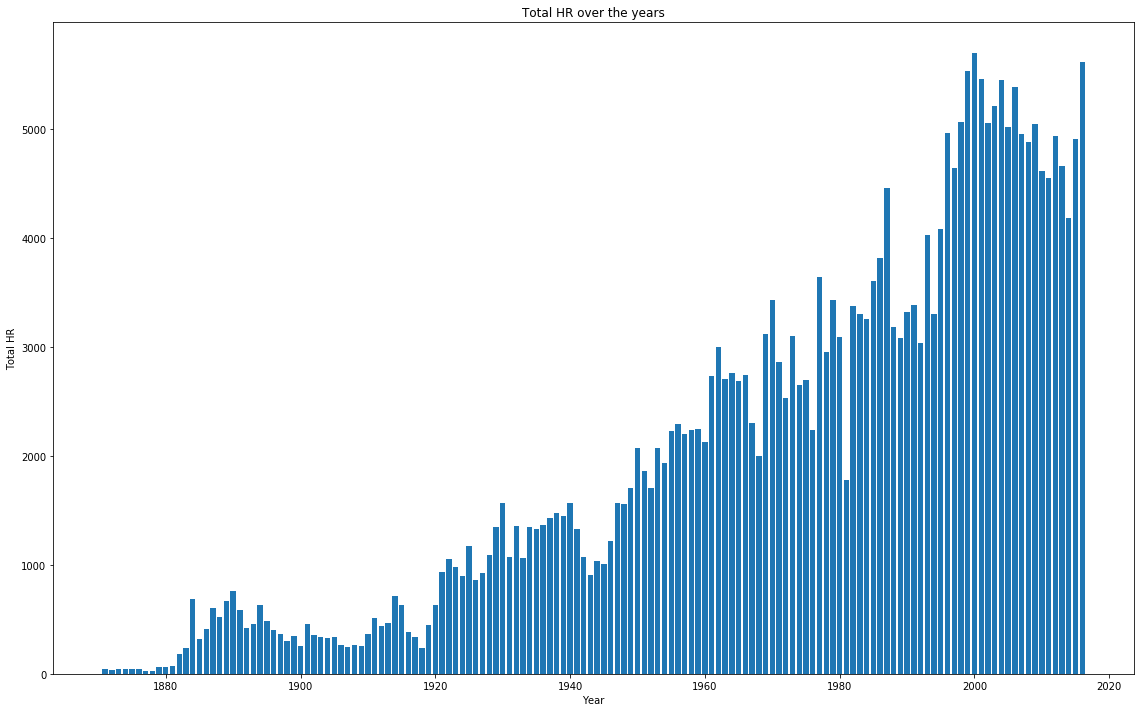

In [28]:
#sum up HR for every season
tot_HR_season = bat_data.groupby('yearID').sum()['HR'].reset_index()
#bar-plot
fig, axes = plt.subplots(figsize=(16,10))
axes.bar(tot_HR_season['yearID'],tot_HR_season['HR'], align="center")
axes.set_title("Total HR over the years")
axes.set_ylabel("Total HR")
axes.set_xlabel("Year")
fig.tight_layout()

### Graph: average HRs per AB per season (line-graph)

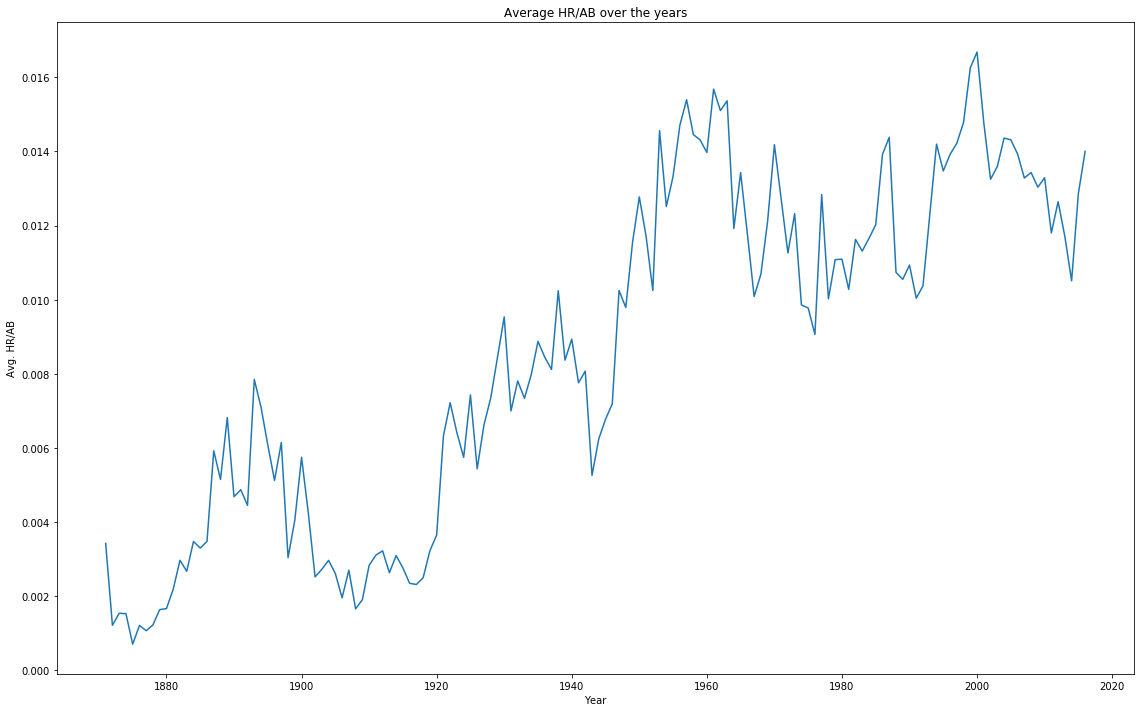

In [46]:
#generate a dataframe for HR/AB for each player for every season
HR_AB = bat_data.pivot_table(values=['HR','AB'], index=['playerID','yearID'],aggfunc='sum').reset_index()
HR_AB['HR_per_AB']=HR_AB['HR']/HR_AB['AB']
#fill 0 inplace of NaN generated by 0/0 instances
HR_AB.fillna(value=0,inplace=True)
avg_HR_AB = HR_AB.pivot_table(values=['HR_per_AB'], index='yearID',aggfunc='mean').reset_index()
#line-graph
fig, axes = plt.subplots(figsize=(16,10))
axes.plot(avg_HR_AB['yearID'],avg_HR_AB['HR_per_AB'])
axes.set_ylabel("Avg. HR/AB")
axes.set_xlabel("Year")
axes.set_title("Average HR/AB over the years")
fig.tight_layout()